# 비선형 시계열 알고리즘

## 상태 공간 모형(State Space Models)

> **"시계열 생성 구조를 관측식(Observation Equation)과 상태 전이식(State Transition Equation) 두 개의 수식으로 정의하는 시계열 모형"**
> - **관측식(Observation Equation)**  
> : 현재의 상태 $x_t$와 잡음(에러) $\upsilon_t$에 의해 실제로 측정가능한 출력 $y_t$를 생성하는 관계식

\begin{align*}
y_t = f(x_t, \upsilon_t)  
\end{align*}

> - **상태 전이식(State Transition Equation)**  
> : 이전의 상태 $x_{t-1}$와 현재 생성된 잡음(에러) $w_t$에 의해 현재의 상태 $x_t$가 생성되는 관계식

\begin{align*}
x_t = g(x_{t-1}, w_t)  
\end{align*}

> - **동적 시스템(Dynamic System)**  
> : 입력 시계열을 받아 출력 시계열을 내놓는 시스템  
> : (예시) ARMA 모형의 경우 백색잡음 $\epsilon_t$를 입력받아 $y_t$를 출력하는 동적 시스템  

> - **상태 변수(State Variable)**  
> : 동적 시스템의 현재 상태를 정의하는 값의 집합  
> : (예시) AR($p$) 모형의 동적시스템은 $p$개의 과거 $Y$값 $\{Y_{t-1}, Y_{t-2}, \cdots, Y_{t-p}\}$이 상태변수  
> : (예시) ARMA($p,q$) 모형의 동적시스템은 $p$개의 과거 $Y$값 $\{Y_{t-1}, Y_{t-2}, \cdots, Y_{t-p}\}$과 $q$개의 과거 $\epsilon$값 $\{\epsilon_{t-1}, \epsilon_{t-2}, \cdots, \epsilon_{t-q}\}$이 상태변수  

\begin{align*}
\text{Equation of AR}(p) && Y_t = \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + \epsilon_t
\end{align*}

\begin{align*}
\text{Equation of ARMA}(p,q) && Y_t = \phi_1 Y_{t-1} +  \cdots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1}  \cdots  + \theta_q \epsilon_{t-q} + \epsilon_t
\end{align*}

<center><img src='Image/SSM_Example.png' width='500'></center>

### 지수평활법(Simple Exponential Smoothing)

> **"추세나 계절성 패턴이 없는 경우 적합"**  
> **"미래 시계열 데이터는 과거 특정기간 동안의 평균값이며 그 이전의 값들은 미래에 어떠한 정보도 주지 않는다"**  

\begin{align*}
\hat{Y}_{t+1} & = \dfrac{1}{T}\displaystyle \sum_{i=0}^{T} Y_{t-i} \\ & or \\
\hat{Y}_{t+1} & = \dfrac{\alpha}{T}\displaystyle \sum_{i=1}^{T} (1-\alpha)^i Y_{t-i} \\
\end{align*}

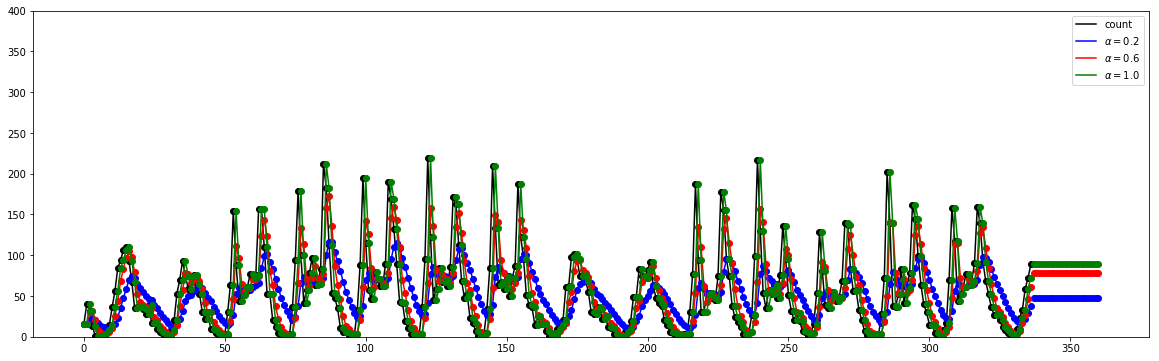

In [9]:
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt

location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Simple Exponential Smoothing
target = raw_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

fit1 = SimpleExpSmoothing(target).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(24).rename(r'$\alpha=0.2$')
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

fit2 = SimpleExpSmoothing(target).fit(smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(24).rename(r'$\alpha=0.6$')
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')

fit3 = SimpleExpSmoothing(target).fit()
fcast3 = fit3.forecast(24).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

### 선형 추세 알고리즘 by Holt

> **"간단 지수평활법에 추세를 반영한 예측 알고리즘"**  

\begin{align*}
\text{Main equation}  && \hat{Y}_{t+h} &= \ell_{t} + hb_{t} \\
\text{Level equation} && \ell_{t} &= \alpha Y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation} && b_{t}    &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 -\beta^*)b_{t-1}  
\end{align*}

\begin{align*}
where~0 \leq \beta^* \leq 1~is~the~smoothing~parameter~for~the~trend
\end{align*}

| Year | $t$ | $Y_t$ | $ℓ_t$ | $b_t$ | $\hat{Y_t}$ |
|------|---|-------|-------|------|-------|
| 2014 | 0 |  | 17.55 | 4.31 |  |
| 2015 | 1 | 17.55 | 18.41 | 3.62 | 21.86 |
| 2016 | 2 | 21.86 | 21.89 | 3.59 | 22.03 |
| 2017 | 3 | 23.89 | 24.21 | 3.33 | 25.48 |
| 2018 | 4 | 26.93 | 27.05 | 3.24 | 27.54 |

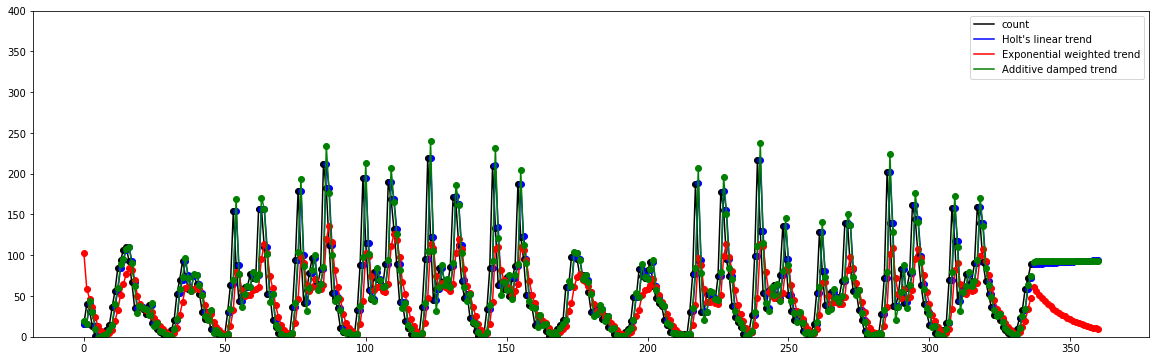

In [8]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.api import Holt
import matplotlib.pyplot as plt

location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Holt's Linear Trend
target = raw_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

fit1 = Holt(target).fit()
fcast1 = fit1.forecast(24).rename("Holt's linear trend")
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')

fit2 = Holt(target, exponential=True).fit()
fcast2 = fit2.forecast(24).rename("Exponential weighted trend")
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')

fit3 = Holt(target, damped=True).fit()
fcast3 = fit3.forecast(24).rename("Additive damped trend")
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

### 계절 알고리즘 by Holt-Winter

> **"선형 추세 알고리즘에 계절성을 반영한 예측 알고리즘"**  

- **Additive Seasonal Method:** $Y_t = T_t + S_t + R_t$, 계절성 변화의 크기가 시간 흐름에 따라 일정한 경우 선호

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= \ell_{t} + hb_{t} + s_{t-m+h_{m}^{+}} \\
\text{Level equation}    && \ell_{t} &= \alpha(Y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma (y_{t}-\ell_{t-1}-b_{t-1}) + (1-\gamma)s_{t-m} \\
\end{align*}

\begin{align*}
where~h_{m}^{+} = \lfloor(h-1)/m\rfloor+1~ensures~that~estimates~of~the~sesonal~indices~come~from~the~final~year~of~the~sample \\
\end{align*}

- **Multiplicative Seasonal Method:** $Y_t = T_t \times S_t \times R_t$, 계절성 변화의 크기가 시간 흐름에 비례하여 변경되는 경우 선호

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= (\ell_{t} + hb_{t})s_{t-m+h_{m}^{+}} \\
\text{Level equation}    && \ell_{t} &= \alpha \frac{Y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t}-\ell_{t-1}) + (1 - \beta^*)b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + b_{t-1})} + (1 - \gamma)s_{t-m} \\
\end{align*}

- **Damped Seasonal Method:** Additive와 Multiplicative 모두 사용되며 장기 예측시 무한정 증가/감소를 방지

\begin{align*}
\text{Main equation}     && \hat{Y}_{t+h} &= \left[\ell_{t} + (\phi+\phi^2 + \dots + \phi^{h})b_{t}\right]s_{t+h-m(k+1)} \\
\text{Level equation}    && \ell_{t} &= \alpha(y_{t} / s_{t-m}) + (1 - \alpha)(\ell_{t-1} + \phi b_{t-1}) \\
\text{Trend equation}    && b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)\phi b_{t-1} \\
\text{Seasonal equation} && s_{t} &= \gamma \frac{y_{t}}{(\ell_{t-1} + \phi b_{t-1})} + (1 - \gamma)s_{t-m} \\
\end{align*}

> **Summary of Smoothing Parameters:**

| Level | Trend | Seasonality | Damping |
|----------|---------|-------------|---------|
| $\alpha$ | $\beta$ | $\gamma$ | $\phi$ |



- **Example of Estimation Process:**


| - | $t$ | $Y_t$ | $\ell_t$ | $b_t$ | $s_t$ | $\hat{Y}_t$ |
|---------|-------|-------|-------|-------|-------------|-----------------|
| 2004 Q1 | -3 | - | - | - | 1.24 | - |
| 2004 Q2 | -2 | - | - | - | 0.77 | - |
| 2004 Q3 | -1 | - | - | - | 0.96 | - |
| 2004 Q4 | 0 | - | 32.49 | 0.7 | 1.02 | - |
| 2005 Q1 | 1 | 42.21 | 33.51 | 0.71 | 1.24 | 41.29 |
| 2005 Q2 | 2 | 24.65 | 33.24 | 0.68 | 0.77 | 26.36 |
| 2005 Q3 | 3 | 32.67 | 33.94 | 0.68 | 0.96 | 32.62 |
| 2005 Q4 | 4 | 37.26 | 35.4 | 0.7 | 1.02 | 35.44 |
| - | ⋮ | ⋮ | ⋮ | ⋮ | ⋮ | ⋮ |
| 2015 Q1 | 41 | 73.26 | 58.57 | 0.66 | 1.24 | 72.59 |
| 2015 Q2 | 42 | 47.7 | 60.42 | 0.69 | 0.77 | 45.62 |
| 2015 Q3 | 43 | 61.1 | 62.17 | 0.72 | 0.96 | 58.77 |
| 2015 Q4 | 44 | 66.06 | 63.62 | 0.75 | 1.02 | 64.38 |
| - | $h$ | - | - | - | - | $\hat{Y}_{T+h}$ |
| 2016 Q1 | 1 | - | - | - | - | 80.09 |
| 2016 Q2 | 2 | - | - | - | - | 50.15 |
| 2016 Q3 | 3 | - | - | - | - | 63.34 |
| 2016 Q4 | 4 | - | - | - | - | 68.18 |
| 2017 Q1 | 5 | - | - | - | - | 83.8 |
| 2017 Q2 | 6 | - | - | - | - | 52.45 |
| 2017 Q3 | 7 | - | - | - | - | 66.21 |
| 2017 Q4 | 8 | - | - | - | - | 71.23 |


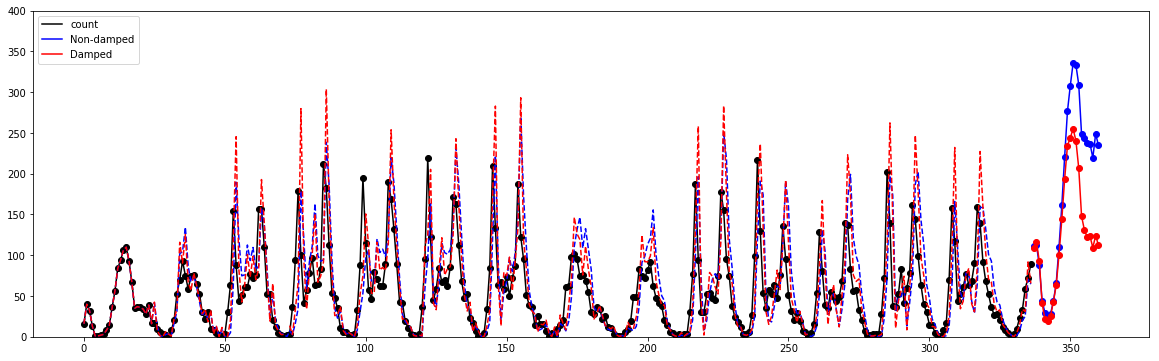

In [7]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

location = '../Data/Bike_Sharing_Demand_Full.csv'
raw_all = pd.read_csv(location)

# Holt-Winter's Seasonal
target = raw_all.loc[:24*7*2, 'count']
target.plot(marker='o', color='black', legend=True, figsize=(20,6), ylim=(0,400))

fit1 = ExponentialSmoothing(target, seasonal_periods=24, trend='add', seasonal='add').fit(use_boxcox=True)
fcast1 = fit1.forecast(24).rename("Non-damped")
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(style='--', color='blue')

fit2 = ExponentialSmoothing(target, seasonal_periods=24, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fcast2 = fit2.forecast(24).rename("Damped")
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(style='--',  color='red')

plt.show()

### 지수평활법 알고리즘 분류 요약

- **알고리즘 옵션 분류**

| Trend Component | Seasonal Component | - | - |
|-------------------------|--------------------|------------|------------------|
| - | N | A | M |
| - | (None) | (Additive) | (Multiplicative) |
| N (None) | (N,N) | (N,A) | (N,M) |
| A (Additive) | (A,N) | (A,A) | (A,M) |
| $A_d$ (Additive damped) | ($A_d$,N) | ($A_d$,A) | ($A_d$,M) |

- **각 분류별 알고리즘**

| Short hand | Method |
|------------|-------------------------------------|
| (N,N) | Simple exponential smoothing |
| (A,N) | Holt’s linear method |
| ($A_d$,N) | Additive damped trend method |
| (A,A) | Additive Holt-Winters’ method |
| (A,M) | Multiplicative Holt-Winters’ method |
| ($A_d$,M) | Holt-Winters’ damped method |

<center><img src='Image/TS_ExponentialSmoothing.png' width='800'></center> 

### ETS(Error/Trend/Seasonal) 알고리즘

**1) ETS(A,N,N): simple exponential smoothing with additive errors**  
**2) ETS(M,N,N): simple exponential smoothing with multiplicative errors**  
**3) ETS(A,A,N): Holt’s linear method with additive errors**  
**4) ETS(M,A,N): Holt’s linear method with multiplicative errors**  

<center><img src='Image/TS_ETS_Equation.png' width='800'></center> 

<center><img src='Image/TS_ETS_Figure.png' width='600'></center> 

| Model | Forecast variance: $\sigma_h^2$ |
|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| (A,N,N) | $\sigma_h^2 = \sigma^2\big[1 + \alpha^2(h-1)\big]$ |
| (A,A,N) | $\sigma_h^2 = \sigma^2\Big[1 + (h-1)\big\{\alpha^2 + \alpha\beta h + \frac16\beta^2h(2h-1)\big\}\Big]$ |
| (A,$A_d$,N) | $\sigma_h^2 = \sigma^2\biggl[1 + \alpha^2(h-1) + \frac{\beta\phi h}{(1-\phi)^2} \left\{2\alpha(1-\phi) +\beta\phi\right\} \\ \mbox{} - \frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)} \left\{ 2\alpha(1-\phi^2)+ \beta\phi(1+2\phi-\phi^h)\right\}\biggr]$ |
| (A,N,A) | $\sigma_h^2 = \sigma^2\Big[1 + \alpha^2(h-1) + \gamma k(2\alpha+\gamma)\Big]$ |
| (A,A,A) | $\sigma_h^2 = \sigma^2\Big[1 + (h-1)\big\{\alpha^2 + \alpha\beta h + \frac16\beta^2h(2h-1)\big\} \\ \mbox{} + \gamma k \big\{2\alpha+ \gamma + \beta m (k+1)\big\} \Big]$ |
| (A,$A_d$,A) | $\sigma_h^2 = \sigma^2\biggl[1 + \alpha^2(h-1) + \gamma k(2\alpha+\gamma) \\ \mbox{} +\frac{\beta\phi h}{(1-\phi)^2} \left\{2\alpha(1-\phi) + \beta\phi \right\} \\ \mbox{} - \frac{\beta\phi(1-\phi^h)}{(1-\phi)^2(1-\phi^2)} \left\{ 2\alpha(1-\phi^2)+ \beta\phi(1+2\phi-\phi^h)\right\} \\ \mbox{} + \frac{2\beta\gamma\phi}{(1-\phi)(1-\phi^m)}\left\{k(1-\phi^m) - \phi^m(1-\phi^{mk})\right\}\biggr]$ 

### 확장 알고리즘 및 응용 예시

**1) 확률적 변동성 모형 (Stochastic Volatility Model)**
> - 정적 변동성 모형: ARCH(Autoregressive conditional heteroskedasticity), GARCH(Generalized Autoregressive conditional heteroskedasticity)  
> - 정적 변동성 모형과 달리 변동성 자체를 하나의 독립적인 상태 변수로 가정 
> - 널리 사용되는 Heston 모형은 다음과 같이 분산(Variance) 상태 변수 $\nu_t$를 가지는 연속 시간 모형 

\begin{align*}
dS_t   &= \mu S_t\,dt + \sqrt{\nu_t} S_t\,dW^S_t  \\
d\nu_t &= \kappa(\theta - \nu_t)\,dt + \xi \sqrt{\nu_t}\,dW^{\nu}_t
\end{align*}

**2) 히든 마코프 모형 (HMM: Hidden Markov Model)**
> - 상태 변수  $x$ 값이 연속 확률변수가 아니라 1차원 이산 확률변수(Discrete Random Variable)인 경우 히든 마코프 모형이 됨 
> - 히든 마코프 모형의 상태 전이식은 다음과 같은 조건부 확률로 정의됨 
> - 주로 음성 처리에서 많이 사용되지만 경제학 분야에서도 구조적 변화에 의한 시계열 특성이 변화하는 경우에 사용됨 

\begin{align*}
P(x_{t} = x_i | x_{t-1} = x_j )
\end{align*}

**3) 칼만 필터**
> - 선형 동적 모형에 대한 필터링 문제와 스무딩 문제를 푸는 방법 중 가장 널리 쓰임 
> - 칼만 필터는 확률 변수의 분포를 갱신하는 베이지안 필터(Bayesian Filter)의 한 종류 
> - 가우시안 분포를 가지는 선형 시스템이라는 제약 조건을 훌륭하게 사용하여 상태 변수의 평균과 분산을 간단히 갱신하는 효율적 알고리즘 

**4) 마코프 체인 몬테카를로 (MCMC: Markov Chain Monte Carlo)**
> - 상태 공간 모형의 확률 분포가 가우시안 정규 분포가 아니거나 정확한 분포의 수식을 알 수 없을 때 주로 활용 
> - MCMC 방법은 특정한 마코프 체인 확률 과정을 사용하여 생성한 시뮬레이션을 통해 분포의 형상을 추정 

**5) 응용 사례**
> - 자동 제어(automatic), 항법(navigation) 시스템. 신호처리(signal processing) 분야에 많이 사용 
> - 최근에는 경제학이나 일반 시계열 모형에서도 상태 공간 모형이 일반화 
> - [도립진자](https://www.youtube.com/watch?v=B6vr1x6KDaY), [카메라 안정기](https://www.youtube.com/watch?v=X2vvdJGxPkI), [드론 항법 장치](https://www.youtube.com/watch?v=7BoDS9Gzsko)

- **기존 ARMA 모형에서 다루기 힘든 문제들을 해결하는데 도움**  
1) 시계열의 구조적 모형(structural model)  
2) 일부 누락된 데이터(missing data)가 있는 경우  
3) 시간에 따라 모형 계수가 변화(time-varing or switching)하는 경우  
4) 변수의 분포가 정규 분포가 아닌 경우  

# 다변량 시계열 알고리즘

- **필요성:**
    - 단변량 시계열(Simple/Multiple포함)은 종속변수($Y_t$)가 독립변수들에만! 영향을 받는다는 큰 가정 존재
    - 현실적으론 종속변수와 독립변수는 상호 영향을 주고받음
        - 예시: 개인 소득과 지출 중 어떤게 Y로 적합한가?라는 질문은 왜 하지 않는가?

> **2차원(소득과 지출 모두를 종속변수) 과거1시점까지만을 고려하는 백터자기회귀 알고리즘**

>\begin{align*}
\text{Equation of VAR(1)} && Y_{[t]} &= A Y_{[t-1]} + \epsilon_{[t]} \\
\text{where} && Y_{[t]} &= \begin{bmatrix} Y_{1t} \\ Y_{2t} \end{bmatrix},
A = \begin{bmatrix} \phi_{11} \phi_{12} \\ \phi_{21} \phi_{22} \end{bmatrix},
Y_{[t-1]} = \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \end{bmatrix}, \\
&& \epsilon_{[t]} &= \begin{bmatrix} e_{1t} \\ e_{2t} \end{bmatrix} \sim N(0, \textstyle \sum_{\epsilon_{[t]}}) \\
\text{Each Equation of VAR(1)} && Y_{1t} &= \phi_{11} Y_{1t-1} + \phi_{12} Y_{2t-1} + e_{1t} \\
&& Y_{2t} &= \phi_{21} Y_{1t-1} + \phi_{22} Y_{2t-1} + e_{2t} \\
\end{align*}

## 벡터자기회귀 모형(Vector Autoregressive Model)

**1) VAR 알고리즘:**
> **단변량 시계열과 같이 평균 벡터와 공분산 벡터가 시차 $l$에만 의존하고 각각의 절대위치에 독립적이면 정상성(Stationary) 시계열**

\begin{align*}
\text{Generalized Equation of VAR(1)} && Y_{[t]} &= A_1 Y_{[t-1]} + e_t \\
\text{where} && Y_{[t]} &= \begin{bmatrix} Y_{1t} \\ Y_{2t} \\ \vdots \\ Y_{kt} \end{bmatrix},
A_1 = \begin{bmatrix} \phi_{11}^1 \phi_{12}^1 \cdots \phi_{1k}^1 \\ \phi_{21}^1 \phi_{22}^1 \cdots \phi_{2k}^1 \\ \vdots \\ \phi_{k1}^1 \phi_{k2}^1 \cdots \phi_{kk}^1 \end{bmatrix},
Y_{[t-1]} = \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \\ \vdots \\ Y_{kt-1} \end{bmatrix}, \\
&& \epsilon_{[t]} &= \begin{bmatrix} e_{1t} \\ e_{2t} \\ \vdots \\ e_{kt} \end{bmatrix} \sim N(0, \textstyle \sum_{\epsilon_{[t]}}) \\
\text{Each Equations} && Y_{1t} &= \phi_{11}^1 Y_{1t-1} + \phi_{12}^1 Y_{2t-1} + \cdots + \phi_{1k}^1 Y_{kt-1} + e_{1t} \\
&& Y_{2t} &= \phi_{21}^1 Y_{1t-1} + \phi_{22}^1 Y_{2t-1} + \cdots + \phi_{2k}^1 Y_{kt-1} + e_{2t} \\
&& & \vdots \\
&& Y_{kt} &= \phi_{k1}^1 Y_{1t-1} + \phi_{k2}^1 Y_{2t-1} + \cdots + \phi_{kk}^1 Y_{kt-1} + e_{kt} \\
\end{align*}


\begin{align*}
\text{Generalized Equation of VAR(2)} && Y_{[t]} &= A_1 Y_{[t-1]} + A_2 Y_{[t-2]} + e_t \\
\text{where} && Y_{[t]} &= \begin{bmatrix} Y_{1t} \\ Y_{2t} \\ \vdots \\ Y_{kt} \end{bmatrix},
A_1 = \begin{bmatrix} \phi_{11}^1 \phi_{12}^1 \cdots \phi_{1k}^1 \\ \phi_{21}^1 \phi_{22}^1 \cdots \phi_{2k}^1 \\ \vdots \\ \phi_{k1}^1 \phi_{k2}^1 \cdots \phi_{kk}^1 \end{bmatrix},
Y_{[t-1]} = \begin{bmatrix} Y_{1t-1} \\ Y_{2t-1} \\ \vdots \\ Y_{kt-1} \end{bmatrix}, \\
&& A_2 &= \begin{bmatrix} \phi_{11}^2 \phi_{12}^2 \cdots \phi_{1k}^2 \\ \phi_{21}^2 \phi_{22}^2 \cdots \phi_{2k}^2 \\ \vdots \\ \phi_{k1}^2 \phi_{k2}^2 \cdots \phi_{kk}^2 \end{bmatrix},
Y_{[t-2]} = \begin{bmatrix} Y_{1t-2} \\ Y_{2t-2} \\ \vdots \\ Y_{kt-2} \end{bmatrix}, \\
&& \epsilon_{[t]} &= \begin{bmatrix} e_{1t} \\ e_{2t} \\ \vdots \\ e_{kt} \end{bmatrix} \sim N(0, \textstyle \sum_{\epsilon_{[t]}}) \\
\text{Each Equations} && Y_{1t} &= \phi_{11}^1 Y_{1t-1} + \phi_{12}^1 Y_{2t-1} + \cdots + \phi_{1k}^2 Y_{kt-2} + \phi_{11}^2 Y_{1t-2} + \phi_{12}^2 Y_{2t-2} + \cdots + \phi_{1k}^2 Y_{kt-2} + e_{1t} \\
&& Y_{2t} &= \phi_{21}^1 Y_{1t-1} + \phi_{22}^1 Y_{2t-1} + \cdots + \phi_{2k}^1 Y_{kt-1} + \phi_{21}^2 Y_{1t-2} + \phi_{22}^2 Y_{2t-2} + \cdots + \phi_{2k}^2 Y_{kt-2} + e_{2t} \\
&& & \vdots \\
&& Y_{kt} &= \phi_{k1}^1 Y_{1t-1} + \phi_{k2}^1 Y_{2t-1} + \cdots + \phi_{kk}^1 Y_{kt-1} + \phi_{k1}^2 Y_{1t-2} + \phi_{k2}^2 Y_{2t-2} + \cdots + \phi_{kk}^2 Y_{kt-2} + e_{kt} \\
\end{align*}


\begin{align*}
\text{Generalized Equation of VAR(p)} && Y_{[t]} &= A_1 Y_{[t-1]} + A_2 Y_{[t-2]} + \cdots + A_p Y_{[t-p]} + \epsilon_{[t]} \\
\text{Mean} && \mu_{[t]} &= \text{E}(Y_{[t]})
= \begin{bmatrix} \text{E}(Y_{1t}) \\ \text{E}(Y_{2t}) \\ \vdots \\ \text{E}(Y_{kt}) \end{bmatrix}
= \begin{bmatrix} \mu_{1} \\ \mu_{2}\\ \vdots \\ \mu_{k} \end{bmatrix} \\
\text{Covariance} && \Gamma(l) &= \text{E}[(Y_{[t]} − \mu_{[t]})(Y_{[t]} − \mu_{[t]})^T ] \\
&& &= \begin{bmatrix}
\text{E}[(Y_{1t} − \mu_1)^2] & \text{E}[(Y_{1t} − \mu_1)(Y_{2t} − \mu_2)] & \cdots & \text{E}[(Y_{1t} − \mu_1)(Y_{kt} − \mu_k)] \\
\text{E}[(Y_{2t} − \mu_2)(Y_{1t} − \mu_1)] & \text{E}[(Y_{2t} − \mu_2)^2] & \cdots & \text{E}[(Y_{2t} − \mu_2)(Y_{kt} − \mu_k)] \\
\vdots & \vdots & \ddots & \vdots \\
\text{E}[(Y_{kt} − \mu_k)(Y_{1t} − \mu_1)]& \text{E}[(Y_{kt} − \mu_k)(Y_{2t} − \mu_2)] & \cdots  & \text{E}[(Y_{kt} − \mu_k)^2]  \\
\end{bmatrix} \\
\text{Covariance Diagonal} && D &= \text{diag}(\sqrt{\Gamma_{11}}, \cdots, \sqrt{\Gamma_{kk}}) \\
\text{Cross-correlation Matrix} && \rho(l) &= D^{−1}\Gamma(l)D^{−1} \\
\end{align*}


**2) 임펄스 응답 함수(Impulse Response Function):**

> **VAR 모형은 여러개의 시계열 상호상관관계를 기반으로 각각의 변수가 다른 변수에 어떤 영향을 주는지 임펄스 반응 함수로 알 수 있음**
> - **임펄스(Impulse):** 어떤 시계열이 $t=0$ 일 때 1이고, $t<0$ 또는 $t>1$ 일 때 0인 것
> - **임펄스 반응 함수(Impulse Response Function):** 임펄스 형태의 시계열이 다른 시계열에 미치는 영향을 시간에 따라 표시


### VAR 모듈 정리

| 클래스 이름 | 용도 |
|-------------|-----------------------------------------------|
| VARProcess | 미리 정해진 계수를 가진 $VAR$ 모형 |
| VAR | 주어진 자료의 계수를 추정하기 위한 $VAR$ 모형 |
| VARResults | 주어진 자료로 추정된 $VAR$ 모형 |

**1) VARProcess**

| 출력모듈 | 설명 |
|--------------------------------------|-----------------------------------------------------------|
| acf([nlags]) | 이론적인 공분산 함수(autocovariance function) 계산 |
| acorr([nlags]) | 이론적인 자기상관계수 함수(autocorrelation function) 계산 |
| forecast(y, steps) | 최소자승 미래 예측값 계산 |
| forecast_cov(steps) | 미래 예측 오차 공분산 행렬 계산 |
| forecast_interval(y, steps[, alpha]) | 미래 구간 예측 |
| get_eq_index(name) | 지정한 이름ㄹ 가진 정수 위치 반환 |
| is_stable([verbose]) | 안정성 계산 |
| long_run_effects() | 임펄스 함수의 장기 효과 계산 |
| ma_rep([maxn]) | $MA(\infty$) 계수 행렬 계산 |
| mean() | 기댓값 |
| mse(steps) | 이론적인 미래예측 오차 행렬 계산 |
| plot_acorr([nlags, linewidth]) | 이론적인 자기상관계수 함수 행렬 플롯 |
| plotsim([steps]) | 시물레이션 플롯 |

**2) VAR**

| 출력모듈 | 설명 |
|-------------|---------------|
| endog | 원자료 |
| endog_names | 원자료 변수명 |

**3) VARResults**

| 출력모듈 | 설명 |
|--------------|-------------------------------------------------|
| model | 추정 자료와 모형 차수 등을 가진 VAR 클래스 객체 |
| k_ar | AR 차수 |
| coefs | 추정된 AR 계수 |
| intercept | 추정된 trend constant |
| params | 추정된 전체 계수 (trend constant 포함) |
| bse | 추정된 전체 계수의 표준 오차 |
| tvalues | 추정된 계수의 t statistics |
| pvalues | 추정된 계수의 t statistics에 대한 p value |
| llf | Log Likelihood 값 |
| aic | AIC 값 |
| bic | AIC 값 |
| hqic | HQIC 값 |
| fittedvalues | 추정 모형에 의한 예측값 |
| resid | 추정 모형에 의한 잔차항(Residuals) |
| sigma_u | 추정 모형에 의한 잔차항의 분산 |

### 실습: VAR 데이터생성 및 이해

\begin{align*}
\text{Example of VAR(1)} && Y_{1t} &= 5 + 0.2 Y_{1t-1} + 0.3 Y_{2t-1} + e_{1t} \\
&& Y_{2t} &= 3 - 0.6 Y_{1t-1} + 1.1 Y_{2t-1} + e_{2t} \\
\end{align*}

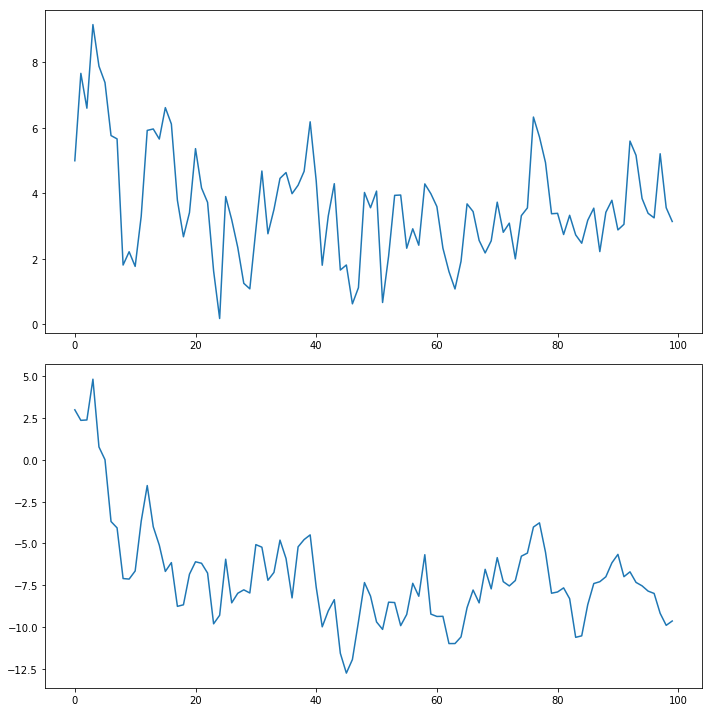

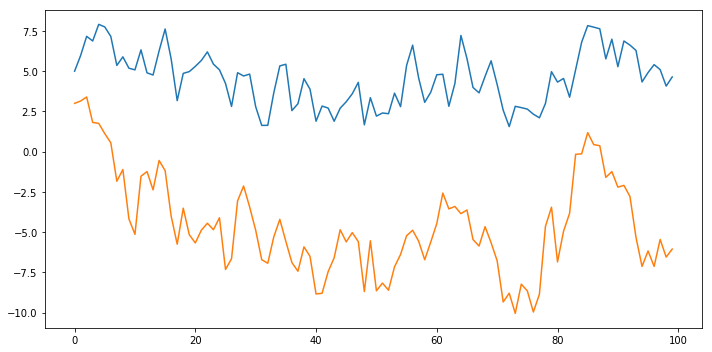

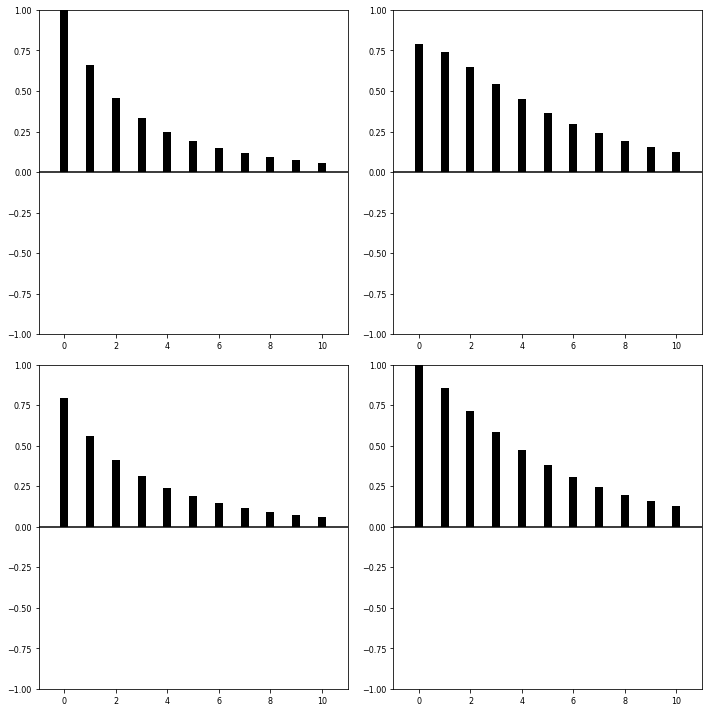

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Apr, 2019
Time:                     20:14:32
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.705305
Nobs:                     99.0000    HQIC:                  0.611661
Log likelihood:          -302.077    FPE:                    1.72990
AIC:                     0.548025    Det(Omega_mle):         1.62964
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         4.198029         0.703943            5.964           0.000
L1.y1         0.338608         0.104184            3.250           0.001
L1.y2         0.261734         0.056821            4.606           0.000

Results for equation 

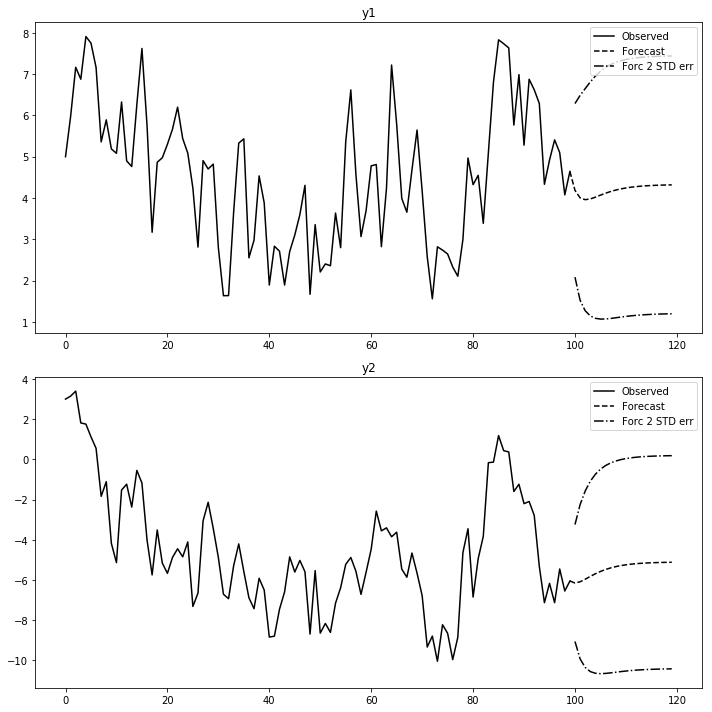

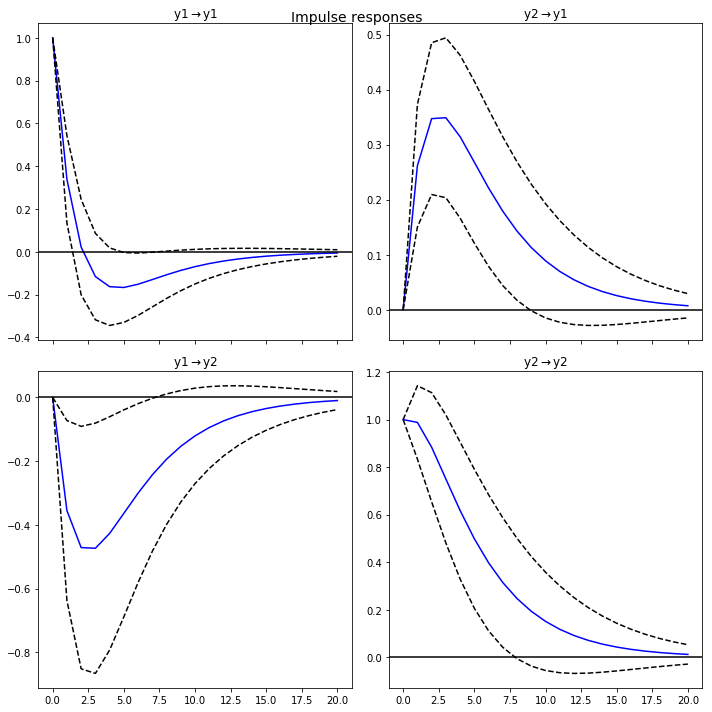

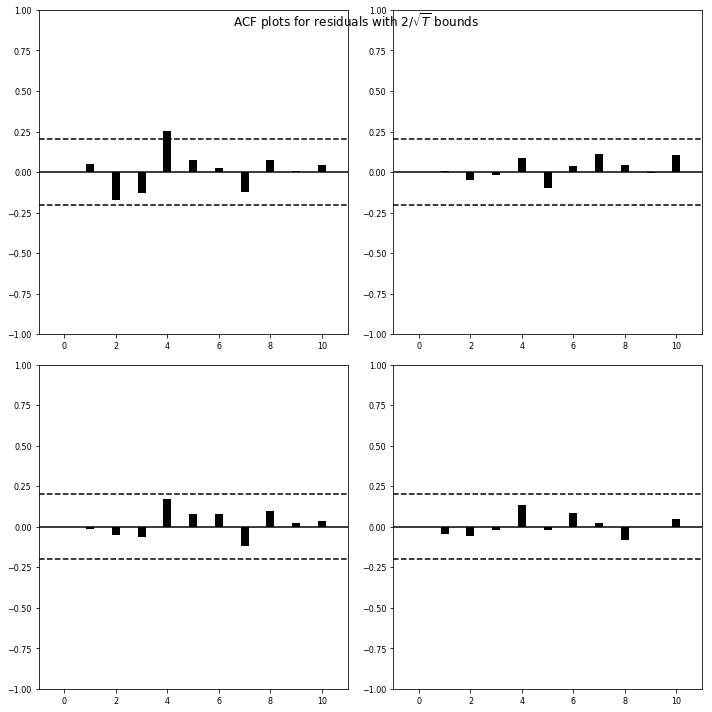

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

# 차수 입력
intercept = np.array([5, 3])
matrix_A = np.array([[[0.2, 0.3], [-0.6, 1.1]]])
residual_covariance = np.array([[1, 0.8],[0.8, 2]])

# VAR 데이터 생성
fit = statsmodels.tsa.vector_ar.var_model.VARProcess(matrix_A, intercept, residual_covariance)
## 시뮬레이션 시각화1
simul_num = 100
fit.plotsim(steps=simul_num, seed=123)
plt.tight_layout()
plt.show()
## 시뮬레이션 시각화2
simul_num = 100
simul_values = statsmodels.tsa.vector_ar.util.varsim(fit.coefs, fit.intercept, fit.sigma_u, steps=simul_num)
plt.figure(figsize=(10,5))
plt.plot(simul_values)
plt.tight_layout()
plt.show()
## ACF 시각화
fit.plot_acorr()
plt.tight_layout()
plt.show()

# VAR 모형적합
fit = sm.tsa.VAR(simul_values).fit()
display(fit.summary())

# 예측 및 시각화
forecast_num = 20
pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)
fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# 임펄스반응함수 추정
fit.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 잔차진단
fit.plot_acorr()
plt.tight_layout()
plt.show()

### 실습: 거시경제 VAR 모형화 및 해석

- **데이터설명:** [링크](http://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html)

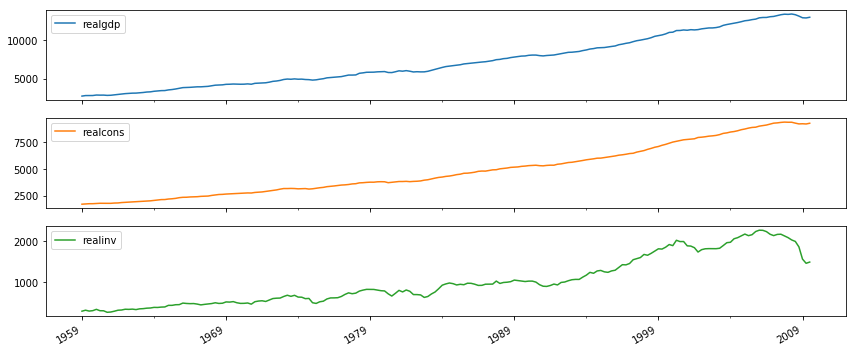

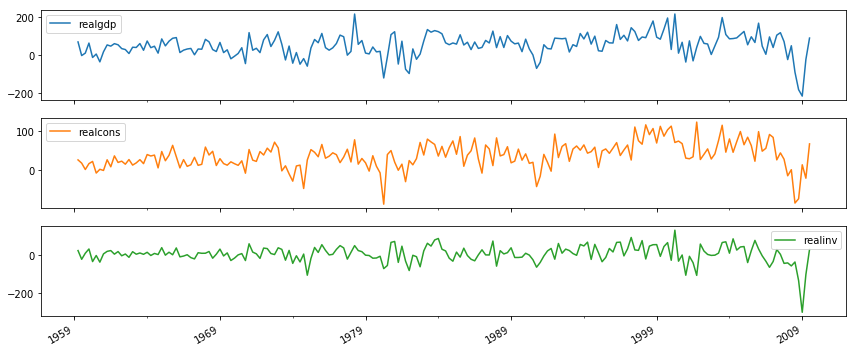

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Apr, 2019
Time:                     20:16:57
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.5675
Nobs:                     200.000    HQIC:                   20.3614
Log likelihood:          -2852.49    FPE:                6.05346e+08
AIC:                      20.2212    Det(Omega_mle):     5.45987e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              10.308143         6.425207            1.604           0.109
L1.realgdp         -0.394370         0.148481           -2.656           0.008
L1.realcons         1.185980         0.186610            6.355    

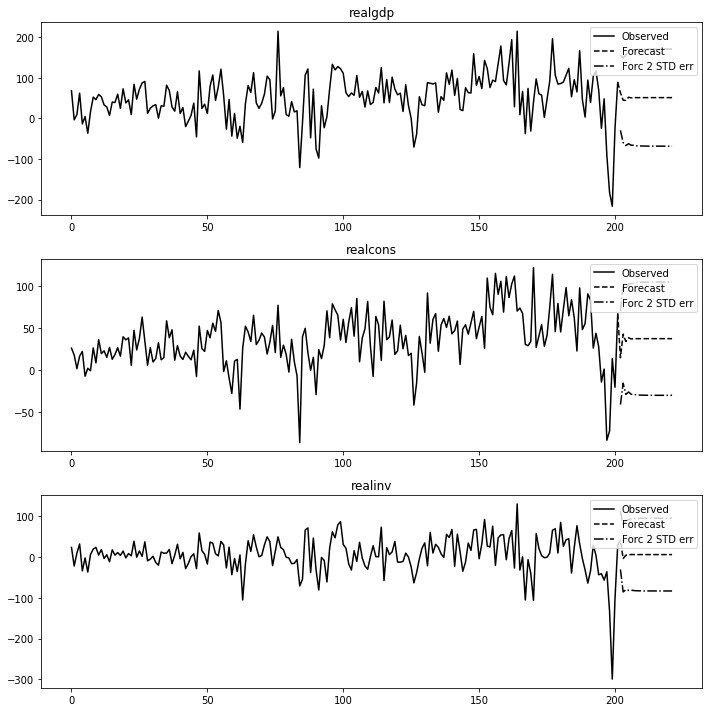

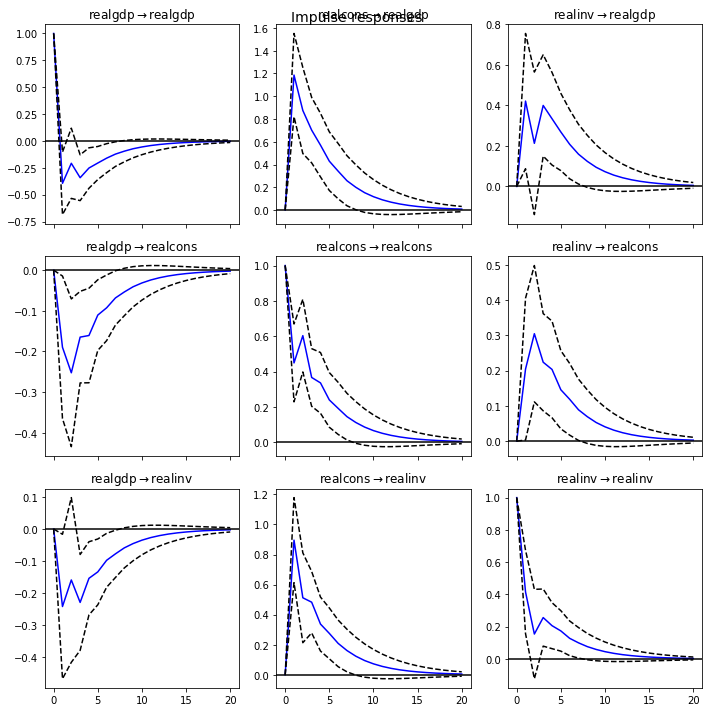

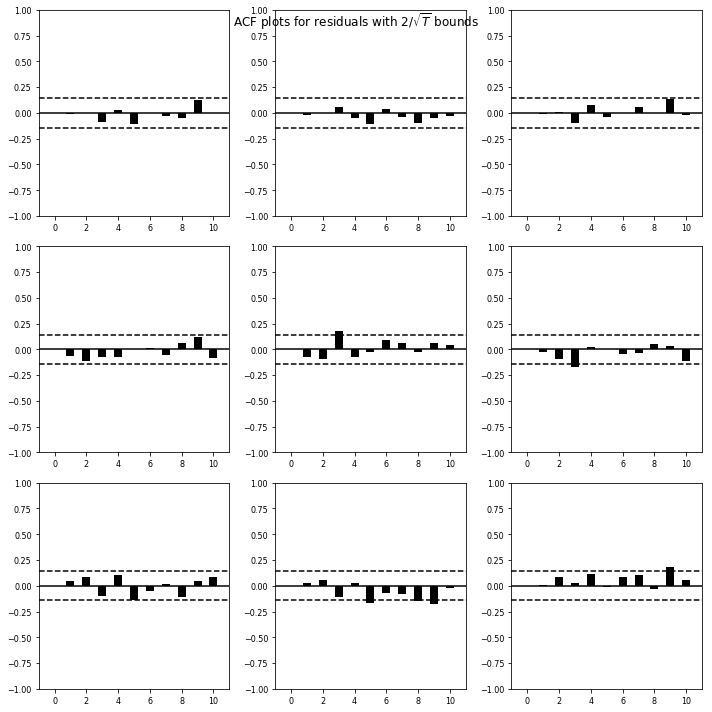

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm

# 데이터 로딩
raw = sm.datasets.macrodata.load_pandas().data
dates_info = raw[['year', 'quarter']].astype(int).astype(str)
raw.index = pd.DatetimeIndex(sm.tsa.datetools.dates_from_str(dates_info['year'] + 'Q' + dates_info['quarter']))
raw_use = raw.iloc[:,2:5]

# 데이터 시각화
raw_use.plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

raw_use.diff(1).dropna().plot(subplots=True, figsize=(12,5))
plt.tight_layout()
plt.show()

# VAR 모형적합
raw_use_return = raw_use.diff(1).dropna()
fit = sm.tsa.VAR(raw_use_return).fit(maxlags=2)
display(fit.summary())

# # 예측 및 시각화
forecast_num = 20
# pred_var = fit.forecast(fit.model.endog[-1:], steps=forecast_num)
# pred_var_ci = fit.forecast_interval(fit.model.endog[-1:], steps=forecast_num)
fit.plot_forecast(forecast_num)
plt.tight_layout()
plt.show()

# 임펄스반응함수 추정
fit.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# 잔차진단
fit.plot_acorr()
plt.tight_layout()
plt.show()

## 공적분 모형(Cointegration Model)

- **공적분 상태(Cointegration):** 두 비정상성 시계열을 선형조합(Linear Combination)하여 생성한 시계열의 적분(Integration) 차수가 낮아지거나 정상상태가 되는 경우

- **공적분 벡터(Cointegration Vector):** 이러한 선형 조합을 만드는 값

- **공적분 시계열(Cointegration Time Series):**
    - 서로 상관관계를 가지지 않음에도 불구하고 장기적으로 같은 방향으로 움직이는 특성
    - 술취한 사람이 개를 끈에 묶어 다니는 경우, 사람과 개는 각자 아무런 상관관계가 없이 움직이지만 서로 너무 멀어지지는 않는 것과 유사
    - 페어 트레이딩 (Pair Trading), 통계적 차익거래 (Statistical Arbitrage) 등의 매매전략에 응용 가능
   
\begin{align*}
\text{Each Integration Order} && Y_1 &\sim I(d_1) \\
&& Y_2 &\sim I(d_2) \\
\text{Cointegration Vector} && \alpha &= [\alpha_1, \alpha_2] \\
\text{where} && \alpha_1 x_1 &+ \alpha_2 x_2 \sim I(b), \;\; b < d_1, \;\; b < d_2 \\
\end{align*}

- **공적분 판별:**
> **Engle-Granger's Representation Theorem (Vector Error Correction Model)**
> \begin{align*}
\text{두 시계열 $Y_{1t} \sim I(1)$, $Y_{2t} \sim I(1)$이 공적분}
& \iff \Delta Y_{2t} = \gamma_1 z_{t-1}  + \sum_{i=1}^K \psi_{1,i} \Delta Y_{1t-i} + \sum_{i=1}^L \psi_{2,i} \Delta Y_{2t-i} + e_{t} \\
& \text{($z_t$는 $Y_{2t}$를 종속변수로 $Y_{1t}$를 독립변수로 회귀분석하여 만들어진 잔차)} \\
\end{align*}
> - $\Delta Y_{1t}$와 $\Delta Y_{2t}$는 항상 정상성 시계열
> - 위 식이 성립하려면 $z_t$와 $e_t$가 정상성 시계열이어야 함 
    1) $Y_{2t}$를 종속변수로 $Y_{1t}$를 독립변수로 회귀분석하여 만들어진 잔차 $z_t$가 정상성 시계열인지를 확인 
    2) 변환된 변수들의 $VECM$ 회귀 분석의 잔차 $e_t$가 정상성 시계열인지를 확인 

### 실습: Cointegration 데이터 생성 및 이해

\begin{align*}
\text{Example of Cointegration} \\
\text{Y1: Random Walk with I(1)} && Y_{1t} &= Y_{1t-1} + e_{1t} \\
\text{Y2: Random Walk with I(1)} && Y_{2t} &= 0.6 Y_{1t} + e_{2t} \\
\text{Y: Stationary Time Series} && Y &= 0.6 Y_{1t} - Y_{2t} \\
\end{align*}

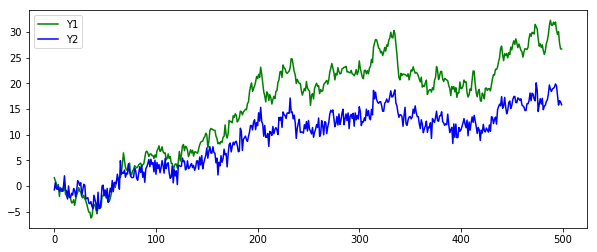

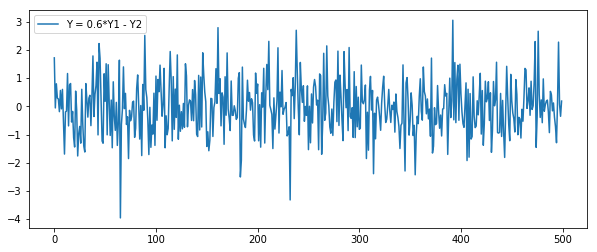

,output
statistics,-22.680907
p-value,0.000000


In [18]:
# 데이터 생성
np.random.seed(1)
Y1 = np.random.randn(500).cumsum()
Y2 = 0.6 * Y1 + np.random.randn(500)
Y = 0.6 * Y1 - Y2

# 시각화
plt.figure(figsize=(10,4))
plt.plot(Y1, 'g', label='Y1')
plt.plot(Y2, 'b', label='Y2')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(Y, label='Y = 0.6*Y1 - Y2')
plt.legend()
plt.show()

# VECM 공적분 확인
coint_result = sm.tsa.coint(Y1, Y2)
pd.DataFrame([coint_result[0], coint_result[1]], index=['statistics', 'p-value'], columns=['output'])

### 실습: 페어 트레이딩 Cointegration 모형화 및 해석

In [29]:
!pip install pandas-datareader

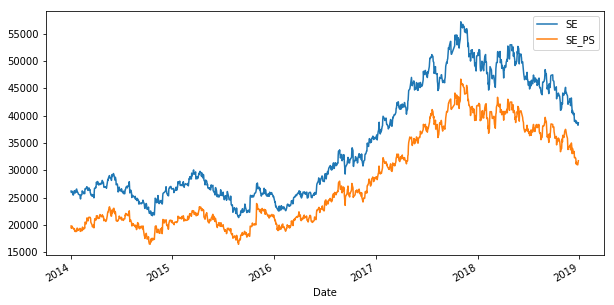

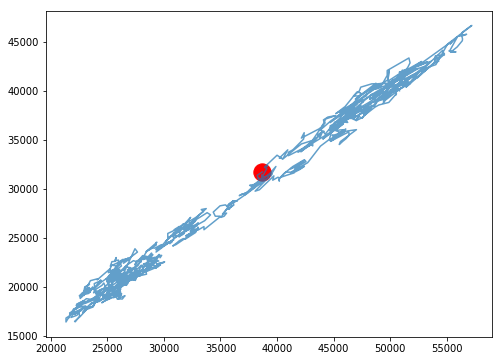

Y1_order:  1 Y2_order:  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SE   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.308e+05
Date:                Tue, 02 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:15:29   Log-Likelihood:                -10198.
No. Observations:                1225   AIC:                         2.040e+04
Df Residuals:                    1223   BIC:                         2.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        913.3575     97.634      9.355      0.000     721.809    1104.906
SE_PS          1.2147      0.003    361.673      0.000       1.208       1.221
==============================================================================
Omnibus:                       11.433   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.659
Skew:                          -0.186   Prob(JB):                      0.00485
Kurtosis:                       2.736   Cond. No.                     9.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

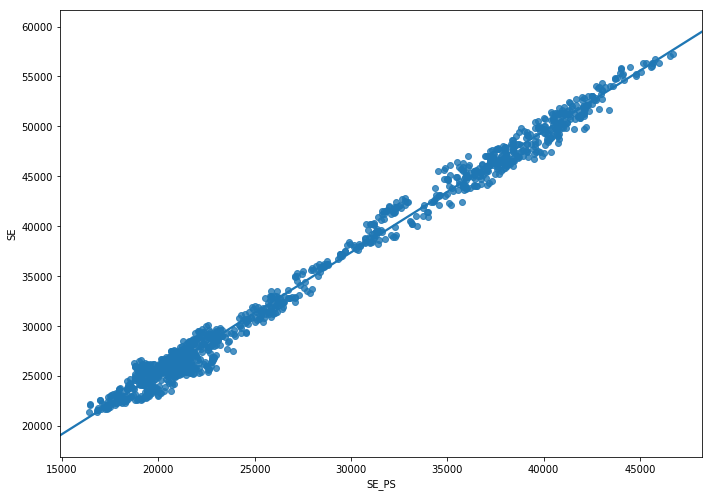

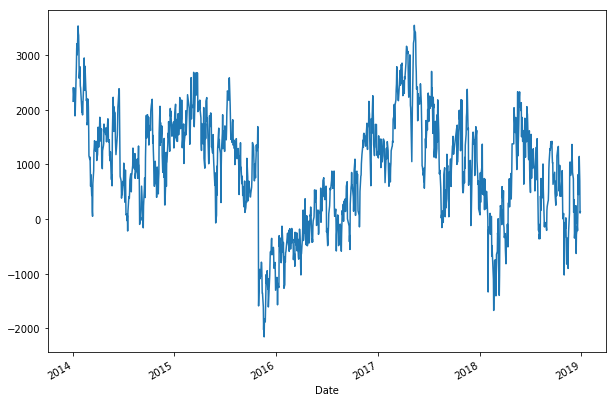

Test Statistics        -3.869588
p-value                 0.002270
Used Lag                8.000000
Used Observations    1216.000000
dtype: float64

,output
statistics,-3.870198
p-value,0.010899


In [86]:
# 데이터 로딩
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2018, 12, 31)
raw1 = web.DataReader("005930.KS", 'yahoo', start, end)
raw2 = web.DataReader("005935.KS", 'yahoo', start, end)
# raw2 = web.DataReader("009150.KS", 'yahoo', start, end)

# 데이터 시각화
## 시계열 움직임
raw = pd.concat([raw1.Close, raw2.Close], axis=1).dropna()
raw.columns = ["SE", "SE_PS"]
raw.plot(figsize=(10,5))
plt.show()

## 비교 움직임
plt.figure(figsize=(8,6))
plt.plot(raw.SE, raw.SE_PS, alpha=0.7)
plt.scatter(raw.SE.values[-1:], raw.SE_PS.values[-1:], c="r", s=300)
plt.show()

# 비정상성 차수 추론
target = raw.SE.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y1_integ_order = 0
if integ_result[1] > 0.1:
    Y1_integ_order = Y1_integ_order + 1
target = raw.SE_PS.copy()
integ_result = pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y2_integ_order = 0
if integ_result[1] > 0.1:
    Y2_integ_order = Y2_integ_order + 1
print('Y1_order: ', Y1_integ_order, 'Y2_order: ', Y2_integ_order)
    
# 회귀분석 적합
## 모델링
Y = raw.SE
X = raw.SE_PS
X = sm.add_constant(X)
fit = sm.OLS(Y, X).fit()
display(fit.summary())

## 회귀분석 시각화
import seaborn as sns
plt.figure(figsize=(10,7))
sns.regplot(x="SE_PS", y="SE", data=raw)
plt.tight_layout()
plt.show()

# 공적분 시계열 시각화
Y_integ = raw.SE - fit.params[1]*raw.SE_PS
plt.figure(figsize=(10,7))
Y_integ.plot()
plt.show()

# 공적분 시계열 비정상성 테스트
target = fit.resid
display(pd.Series(sm.tsa.stattools.adfuller(target)[0:4], 
                  index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations']))

# VECM 공적분 테스트
coint_result = sm.tsa.coint(raw.SE, raw.SE_PS)
pd.DataFrame([coint_result[0], coint_result[1]], index=['statistics', 'p-value'], columns=['output'])

# Reference

https://www.slideshare.net/freepsw/boosting-bagging-vs-boosting  
https://statkclee.github.io/finance/  